In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from dpks import QuantMatrix

sns.set_theme(font="Arial", style="white", context="poster")

In [2]:

def preprocess_design_matrix(design_matrix):

    design_matrix = design_matrix[
        ((design_matrix['Sepsis Prob'] >= 0.8) | 
        (design_matrix['Sepsis Prob'] <= 0.50))
    ].copy()

    design_matrix['group'] = np.where(
        design_matrix['Sepsis Prob'] > 0.65, 2, 1
    )

    design_matrix['sample'] = design_matrix['injection']

    return design_matrix

In [3]:
def preprocess_data(raw_data, design_matrix):

    quant_matrix = QuantMatrix(
        quantification_file=raw_data[['Protein'] + [sample for sample in design_matrix['sample'].values]].copy(),
        design_matrix_file=design_matrix,
        annotation_fasta_file="../0_data/2023-04-24-UP000005640.fas"
    )

    quant_data = quant_matrix.to_df()
    
    quant_data = quant_data[~((quant_data["ProteinLabel"].str.startswith("HV")) | (quant_data["ProteinLabel"].str.startswith("LV")) | quant_data["ProteinLabel"].str.startswith("KV"))]
    quant_data = quant_data[~quant_data["ProteinLabel"].str.startswith("IG")]
    quant_data = quant_data[~((quant_data["ProteinLabel"] == "HBA_HUMAN") | (quant_data["ProteinLabel"] == "HBB_HUMAN") | (quant_data["ProteinLabel"] == "HBD_HUMAN") | (quant_data["ProteinLabel"] == "HEMO_HUMAN"))]


    quant_matrix = QuantMatrix(
        quantification_file=quant_data,
        design_matrix_file=design_matrix,
        annotation_fasta_file="../0_data/2023-04-24-UP000005640.fas"
    )

    return quant_matrix.annotate()     


In [4]:
def preprocess_test_data(raw_data, design_matrix):

    quant_matrix = QuantMatrix(
        quantification_file=raw_data[['Protein'] + [sample for sample in design_matrix['sample'].values]].copy(),
        design_matrix_file=design_matrix,
        annotation_fasta_file="../0_data/2023-04-24-UP000005640.fas"
    )

    quant_data = quant_matrix.to_df()
    
    quant_data = quant_data[~((quant_data["ProteinLabel"].str.startswith("HV")) | (quant_data["ProteinLabel"].str.startswith("LV")) | quant_data["ProteinLabel"].str.startswith("KV"))]
    quant_data = quant_data[~quant_data["ProteinLabel"].str.startswith("IG")]
    quant_data = quant_data[~((quant_data["ProteinLabel"] == "HBA_HUMAN") | (quant_data["ProteinLabel"] == "HBB_HUMAN") | (quant_data["ProteinLabel"] == "HBD_HUMAN") | (quant_data["ProteinLabel"] == "HEMO_HUMAN"))]

    quant_matrix = QuantMatrix(
        quantification_file=quant_data,
        design_matrix_file=design_matrix,
        annotation_fasta_file="../0_data/2023-04-24-UP000005640.fas"
    )

    return quant_matrix.annotate()   

# Model Training

In [5]:
ms_data = pd.read_csv(
    "../0_data/proteins_test_filtered.tsv"
    , sep="\t"
)

In [6]:
design_matrix_otrain = pd.read_csv(
    "../1_clinical_digital_family/design_matrix_test_sepsis_risk.tsv",
    sep='\t'
)

In [7]:
design_matrix_otrain

,Unnamed: 0,injection,sao2_ambulance,resp_frequency_ambulance,heart_rate_ambulance,syst_bp_ambulance,map_ambulance,mental_status_ambulance,temperature_ambulance,crea_emergency_department,...,target_bootstrap_90,target_bootstrap_91,target_bootstrap_92,target_bootstrap_93,target_bootstrap_94,target_bootstrap_95,target_bootstrap_96,target_bootstrap_97,target_bootstrap_98,target_bootstrap_99
0,0,SA_BOX_9-159_S1-D9_1_6172,-0.440508,-0.373111,-1.132467,0.755411,0.270374,1.0,0.304580,-0.242471,...,0.6,0.5,0.6,0.5,0.7,0.7,0.5,0.6,0.6,0.6
1,1,SA_BOX_7-267_S4-H8_1_5971,0.582753,-1.107689,2.044809,-1.263782,-1.356894,1.0,-1.060908,0.221389,...,0.6,0.7,0.6,0.6,0.6,0.6,0.6,0.7,0.6,0.6
2,2,SA_BOX_15-464_S4-G9_1_6763,-0.781594,0.606327,0.564982,1.260209,0.000000,1.0,-0.085559,-0.566094,...,0.8,0.9,0.9,0.8,0.8,0.9,0.8,0.8,0.8,0.8
3,3,SA_BOX_2-1700_S2-D11_1_6971,0.355362,-1.842267,-0.523127,-0.903212,0.000000,1.0,0.011975,0.987296,...,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
4,4,SA_BOX_7-1728_S4-F9_1_5977,-0.781594,-0.128251,-0.218456,-0.182072,0.000000,1.0,0.011975,0.447924,...,0.3,0.3,0.3,0.4,0.4,0.4,0.3,0.3,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,675,SA_BOX_6-659_S2-F10_1_5887,-0.326812,-0.373111,-0.914846,-1.444067,-1.549597,1.0,0.011975,0.221389,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
676,676,SA_BOX_7-2061_S4-H5_1_5946,0.810144,-0.862829,0.956701,-0.650813,0.291785,1.0,0.011975,-0.717118,...,0.5,0.5,0.3,0.3,0.4,0.5,0.5,0.5,0.6,0.5
677,677,SA_BOX_2-764_S2-G2_1_6901,0.127971,0.116608,-2.264100,-0.903212,-1.142780,1.0,-0.183094,0.178239,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,1.0,0.9,0.9
678,678,SA_BOX_6-774_S2-D10_1_5885,1.151231,-0.373111,0.347360,-0.903212,0.000000,1.0,-0.768303,-0.328770,...,0.7,0.7,0.7,0.7,0.7,0.8,0.7,0.7,0.7,0.7


<Axes: xlabel='Sepsis Prob', ylabel='Count'>

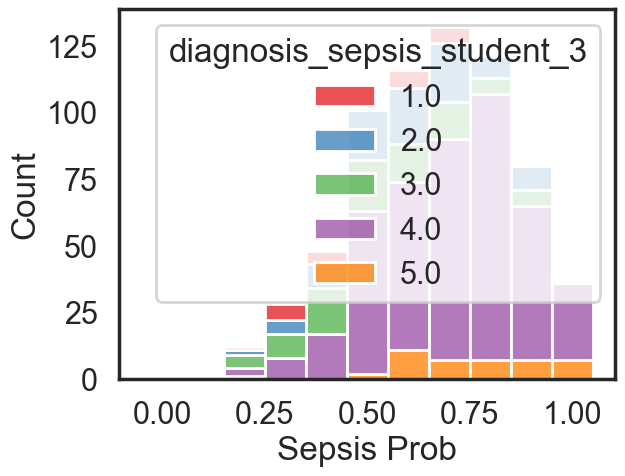

In [8]:
sns.histplot(
    design_matrix_otrain,
    x="Sepsis Prob",
    hue="diagnosis_sepsis_student_3",
    palette="Set1",
    binwidth=0.1,
    binrange=(-0.05, 1.05),
    multiple="stack",
    bins=10,
    # kde=True
)

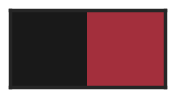

In [9]:
custom_palette = ["k", "#A32F3C"]  # Define hex colors
palette = sns.color_palette(custom_palette, as_cmap=True)
sns.palplot(custom_palette)

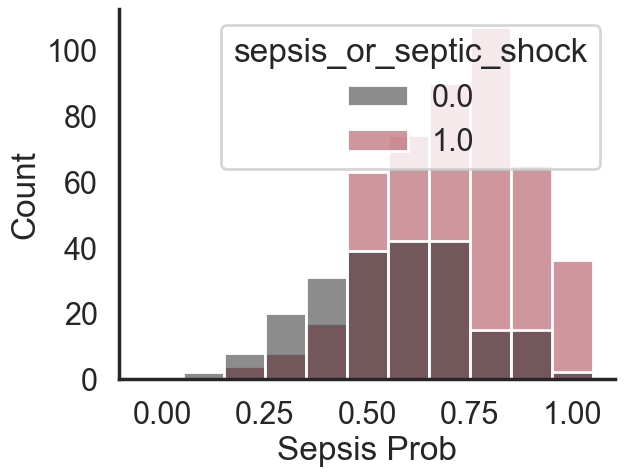

In [10]:
g = sns.histplot(
    design_matrix_otrain,
    x="Sepsis Prob",
    hue="sepsis_or_septic_shock",
    palette=palette,
    binwidth=0.1,
    binrange=(-0.05, 1.05),
    #multiple="stack",
    bins=10,
    # kde=True
)

sns.despine()

g.figure.savefig("sepsis_diagnosis_probability.pdf", dpi=300, bbox_inches="tight")

/tmp/ipykernel_3409634/683471671.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<Axes: xlabel='sepsis_or_septic_shock', ylabel='Sepsis Prob'>

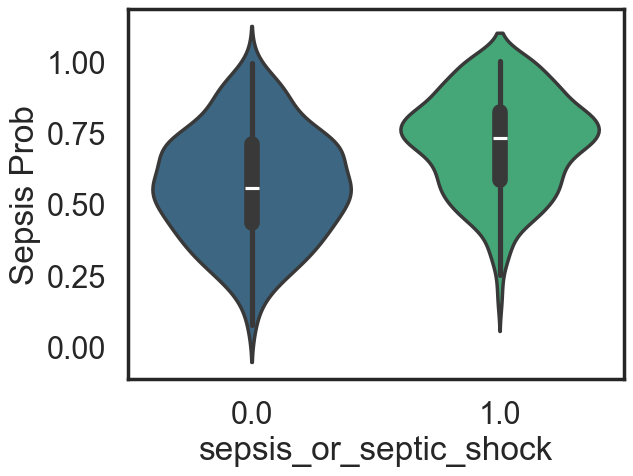

In [11]:
sns.violinplot(
    design_matrix_otrain,
    y="Sepsis Prob",
    x="sepsis_or_septic_shock",
    palette="viridis",
    #multiple="stack",
    # bins=20,
    # kde=True
)

/tmp/ipykernel_3409634/3956527602.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<Axes: xlabel='diagnosis_sepsis_student_3', ylabel='Sepsis Prob'>

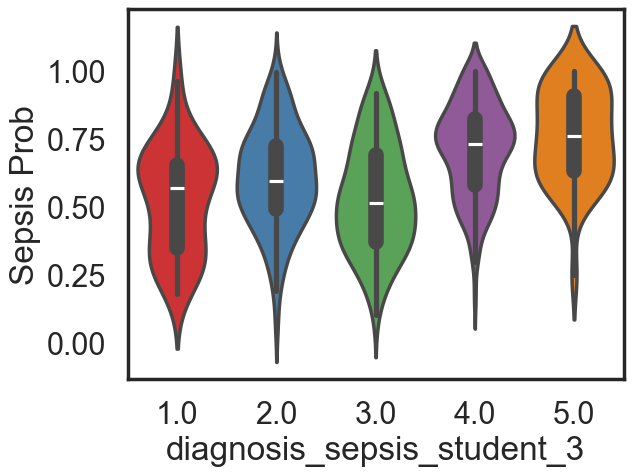

In [12]:
sns.violinplot(
    design_matrix_otrain,
    y="Sepsis Prob",
    x="diagnosis_sepsis_student_3",
    palette="Set1",
    #multiple="stack",
    # bins=20,
    # kde=True
)

In [13]:
design_matrix_train = preprocess_design_matrix(design_matrix_otrain.copy())

<Axes: xlabel='Sepsis Prob', ylabel='Count'>

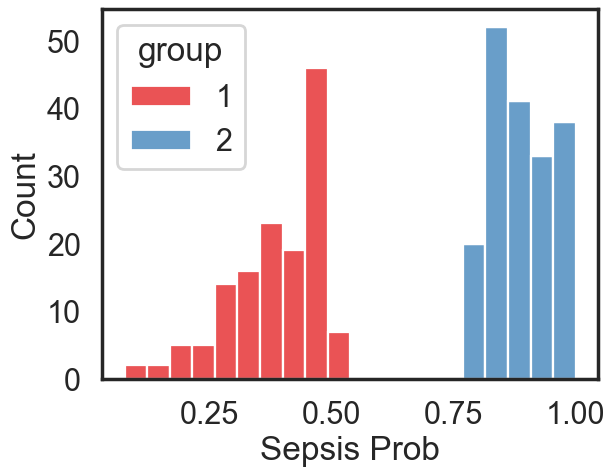

In [14]:
sns.histplot(
    design_matrix_train,
    x="Sepsis Prob",
    hue="group",
    palette="Set1",
    multiple="stack",
    bins=20
)

<Axes: xlabel='diagnosis_sepsis_student_3', ylabel='Count'>

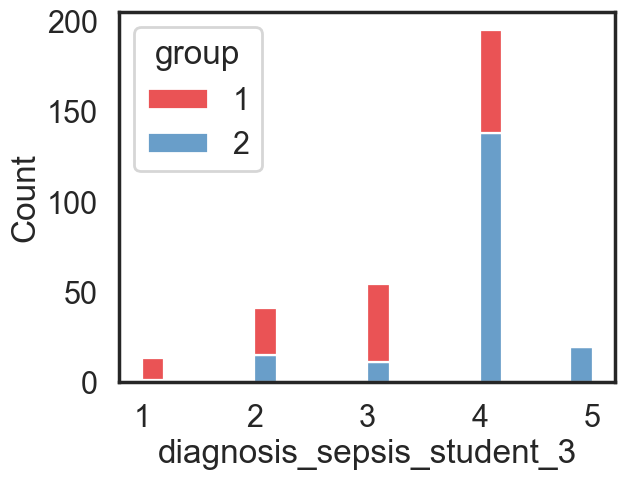

In [15]:
sns.histplot(
    design_matrix_train,
    x="diagnosis_sepsis_student_3",
    hue="group",
    palette="Set1",
    multiple="stack",
    bins=20
)

In [16]:
design_matrix_train['group'].value_counts()

group
2    184
1    139
Name: count, dtype: int64

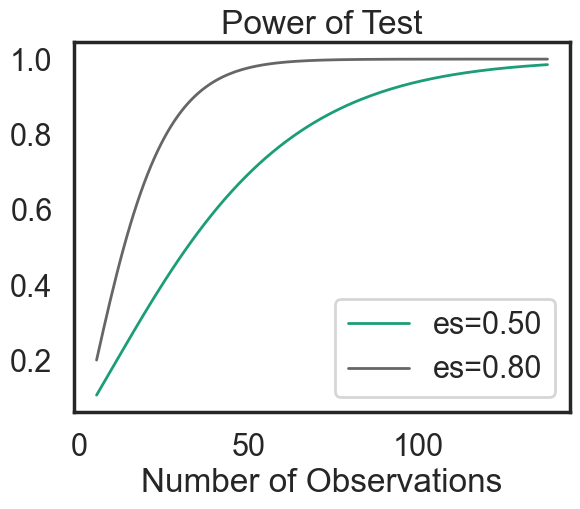

In [17]:
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt

# parameters for power analysis
effect_sizes = np.array([0.5, 0.8])
sample_sizes = np.array(range(5, design_matrix_train['group'].value_counts()[1]))


analysis = TTestIndPower()

analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

In [18]:
quant_matrix_train = preprocess_data(ms_data, design_matrix=design_matrix_train)

In [19]:
quant_matrix_train = quant_matrix_train.compare(
    method="linregress",
    comparisons=(2,1),
    min_samples_per_group=2,
    level="protein",
    multiple_testing_correction_method="fdr_tsbh"
)

In [20]:
quant_matrix_train.write("highrisk_sepsis_de_proteins.tsv")

In [21]:
quant_matrix_de = quant_matrix_train.to_df()

In [22]:
quant_matrix_de['Color'] = np.where(
    quant_matrix_de['CorrectedPValue2-1'] <= 0.01, 1, 0
)

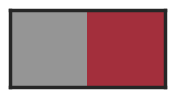

In [23]:
custom_palette = ["#959595", "#A32F3C"]  # Define hex colors
palette = sns.color_palette(custom_palette, as_cmap=True)
sns.palplot(custom_palette)

In [24]:
quant_matrix_de[quant_matrix_de['CorrectedPValue2-1'] <= 0.01]

,Protein,ProteinLabel,Gene,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,...,SA_BOX_15-663_S4-C1_1_6694,SA_BOX_1-259_S1-G5_1_6827,SA_BOX_14-1566_S2-H4_1_6625,SA_BOX_8-1160_S5-E3_1_6025,SA_BOX_12-1949_S5-C4_1_6424,SA_BOX_10-1165_S2-B6_1_6243,SA_BOX_6-659_S2-F10_1_5887,SA_BOX_2-764_S2-G2_1_6901,SA_BOX_4-1196_S5-A2_1_5621,Color
0,P02671,FIBA_HUMAN,FGA,0.709301,19.453968,19.204283,0.234361,0.299039,0.249685,1.617794e-15,...,19.219480,19.434650,19.600700,19.945478,19.228436,19.440404,19.413945,19.446866,19.085731,1
1,P02787,TRFE_HUMAN,TF,0.308802,19.510932,19.664578,0.263755,0.268360,-0.153646,5.052828e-07,...,19.093970,19.402185,19.341731,18.815082,19.635437,19.738758,19.648279,19.465896,19.637913,1
4,P06396,GELS_HUMAN,GSN,0.262258,14.902279,15.123472,0.445965,0.441724,-0.221193,1.364643e-05,...,14.084810,14.368574,14.117389,14.110880,14.517564,15.487246,15.026240,15.276030,15.243752,1
5,P04275,VWF_HUMAN,VWF,0.889054,14.530148,13.882852,0.612361,0.648034,0.647295,7.078274e-18,...,13.416666,13.917390,13.758238,14.561246,14.095655,14.107157,14.223937,14.307892,14.002396,1
6,P10643,CO7_HUMAN,C7,0.168784,14.853979,14.670870,0.494188,0.533656,0.183109,1.641764e-03,...,14.394560,14.489029,13.949304,15.078616,15.751011,14.866351,15.353393,14.677778,15.247171,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,P55056,APOC4_HUMAN,APOC4,0.311241,11.569122,11.972345,0.905650,0.808099,-0.403223,4.534685e-05,...,10.645653,10.437166,10.955241,10.907036,11.806153,12.063437,12.136490,10.265417,12.562347,1
273,Q16270,IBP7_HUMAN,IGFBP7,0.286654,9.689740,9.294330,0.824288,1.080607,0.395410,2.360140e-04,...,9.304019,9.649099,9.074857,10.034904,10.581494,9.402809,10.361490,9.791055,10.260604,1
276,Q9Y279,VSIG4_HUMAN,VSIG4,1.124643,7.127837,5.413401,2.282745,1.977012,1.714436,1.084573e-11,...,3.742087,7.316799,4.234413,9.874901,8.012105,3.557221,7.560878,6.753525,6.965590,1
285,Q7L2H7,EIF3M_HUMAN,EIF3M,0.228714,15.072522,15.326076,0.642458,0.528454,-0.253554,1.917373e-04,...,13.366689,15.305685,14.133238,14.485120,14.229865,15.736272,15.519163,15.556819,15.838997,1


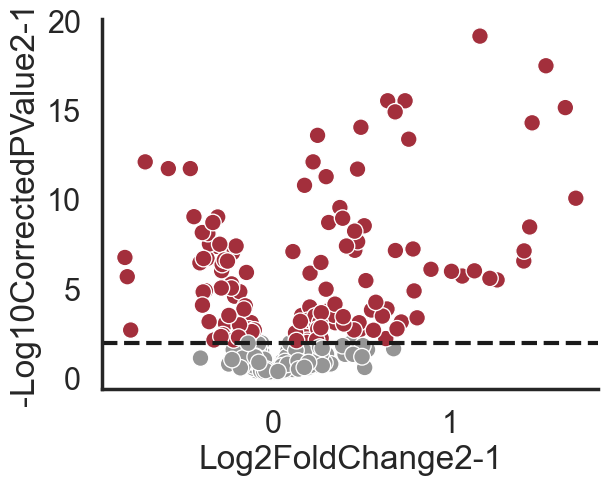

In [25]:
ax = sns.scatterplot(
    data=quant_matrix_de,
    x="Log2FoldChange2-1",
    y="-Log10CorrectedPValue2-1",
    hue="Color",
    #s=30,
    #alpha=0.8,
    legend=False,
    palette=palette
)

ax.axhline(
    -np.log10(0.01), c="k", linestyle="--"
)
sns.despine()
#ax.figure.set_size_inches((3, 3))

In [26]:
ax.figure.savefig(
    "sepsis_volcano.pdf", dpi=300, bbox_inches="tight"
)

In [27]:
enr = quant_matrix_train.enrich(
    method="enrichr_overreptest",
    libraries=['GO_Biological_Process_2023'],
    filter_pvalue=True,
    pvalue_column="CorrectedPValue2-1",
    pvalue_cutoff=0.01
)

In [28]:
base_color = "#A32F3C"

In [29]:
cmap = sns.color_palette(f"light:{base_color}", as_cmap=True)

/srv/data1/home/aaron/envs/miniconda3/envs/revisionenv/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/srv/data1/home/aaron/envs/miniconda3/envs/revisionenv/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


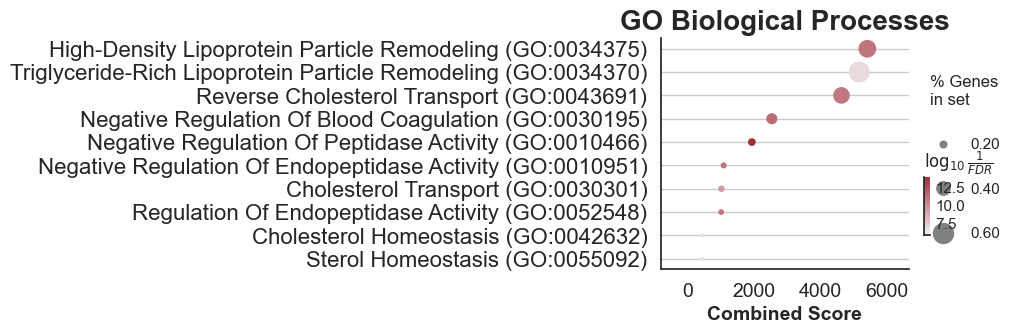

In [30]:
# simple plotting function

sns.set_theme(context="notebook", style="white")
from gseapy import barplot, dotplot

ax = dotplot(
    enr.res2d, 
    title='GO Biological Processes',
    cmap=cmap, 
    size=4, 
    figsize=(4,3),
    cutoff=1,
    top_term=10
    
)

sns.despine()

In [31]:
ax.figure.savefig(
    "sepsis_pathways.pdf", dpi=300, bbox_inches="tight"
)

<Axes: >

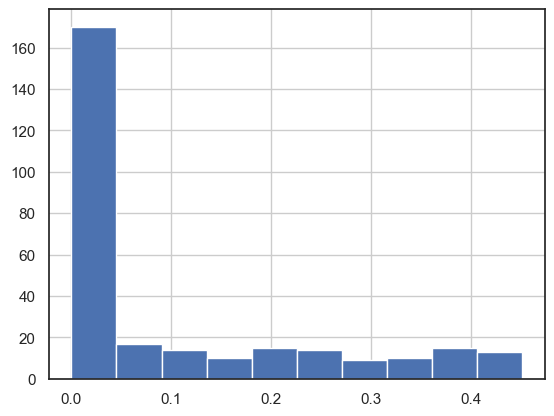

In [32]:
quant_matrix_de['CorrectedPValue2-1'].hist()

In [33]:
qm_filtered = (
    
    QuantMatrix(
        quantification_file=quant_matrix_de,
        design_matrix_file=design_matrix_train
    )
    
)

In [34]:
training_data, y = qm_filtered.to_ml(feature_column="ProteinLabel")

In [35]:
protein_columns = training_data.columns.to_list()

In [36]:
len(protein_columns)

287

In [37]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer

X = training_data.copy()

protein_scaler = StandardScaler()

X[protein_columns] = protein_scaler.fit_transform(X[protein_columns])

X = X.copy()

In [38]:
from sklearn.utils.class_weight import compute_class_weight


class_weight = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y.values.ravel()),
    y=y.values.ravel()
)

class_weight = dict(zip(np.unique(y.values.ravel()), class_weight))

class_weight

{0: 1.1618705035971224, 1: 0.8777173913043478}

In [39]:
from mrmr import mrmr_classif
selected_proteins = mrmr_classif(X=X[protein_columns], y=y.values.ravel(), K=50)

100%|██████████| 50/50 [00:11<00:00,  4.42it/s]


In [40]:
selected_proteins

['TIMP1_HUMAN',
 'KNG1_HUMAN',
 'FIBG_HUMAN',
 'CRP_HUMAN',
 'VWF_HUMAN',
 'ALS_HUMAN',
 'SAA2_HUMAN',
 'CYTC_HUMAN',
 'LBP_HUMAN',
 'IBP3_HUMAN',
 'B2MG_HUMAN',
 'SAA1_HUMAN',
 'H4_HUMAN',
 'FIBA_HUMAN',
 'THBG_HUMAN',
 'AACT_HUMAN',
 'FETUA_HUMAN',
 'FBLN5_HUMAN',
 'FIBB_HUMAN',
 'FETUB_HUMAN',
 'VSIG4_HUMAN',
 'A2GL_HUMAN',
 'CFAD_HUMAN',
 'CLUS_HUMAN',
 'F13B_HUMAN',
 'CSPG2_HUMAN',
 'A1AG1_HUMAN',
 'CATB_HUMAN',
 'HS90A_HUMAN',
 'COIA1_HUMAN',
 'PCYOX_HUMAN',
 'ITIH3_HUMAN',
 'IPSP_HUMAN',
 'RNAS4_HUMAN',
 'VCAM1_HUMAN',
 'PSPB_HUMAN',
 'PROC_HUMAN',
 'CHLE_HUMAN',
 'RS27A_HUMAN',
 'PGRP2_HUMAN',
 'LYSC_HUMAN',
 'CD14_HUMAN',
 'KLKB1_HUMAN',
 'ZPI_HUMAN',
 'CMGA_HUMAN',
 'BTD_HUMAN',
 'A1AT_HUMAN',
 'CATD_HUMAN',
 'KAIN_HUMAN',
 'FBLN3_HUMAN']

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier


# protein_clf = LogisticRegression(
#     random_state=42,
#     penalty="l1",
#     class_weight=class_weight,
#     C=1,
#     solver="liblinear",
#     max_iter=1000
# )

protein_clf = LogisticRegression(
    class_weight=class_weight,
    random_state=42
)

In [42]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate

cv = StratifiedKFold(3)
eval_result = cross_validate(
    protein_clf, X[selected_proteins], y.values.ravel(), scoring=("recall", "precision", "accuracy", "balanced_accuracy"), cv=cv,
)
eval_result['test_recall'].mean(), eval_result['test_precision'].mean(), eval_result['test_accuracy'].mean(), eval_result['test_balanced_accuracy'].mean()

(0.7286268288383572,
 0.8372362531969308,
 0.7616822429906542,
 0.7671811294978094)

In [43]:
from dpks.interpretation import BootstrapInterpreter

protein_interpreter = BootstrapInterpreter(
    n_iterations=100,
    feature_names=selected_proteins,
    downsample_background=True,
    shuffle_iterations=100
)

In [44]:
protein_interpreter.fit(X[selected_proteins].values, y.values.ravel(), protein_clf)

In [45]:
protein_importances = protein_interpreter.results_.sort_values("mean_importance", ascending=False)

In [46]:
protein_importances.head(20)

,feature,iteration_0_importance,iteration_0_rank,iteration_1_importance,iteration_1_rank,iteration_2_importance,iteration_2_rank,iteration_3_importance,iteration_3_rank,iteration_4_importance,...,iteration_98_importance,iteration_98_rank,iteration_99_importance,iteration_99_rank,mean_importance,median_importance,stdev_importance,mean_rank,median_rank,stdev_rank
4,VWF_HUMAN,0.446594,9.0,0.462628,8.0,0.986633,2.0,0.895981,3.0,0.738907,...,0.640725,4.0,0.675714,9.0,0.725177,0.744376,0.232147,6.25,4.0,6.350654
3,CRP_HUMAN,1.000000,1.0,0.437392,10.0,0.437383,15.0,0.110108,37.0,0.244723,...,1.000000,1.0,0.843884,3.0,0.564128,0.572385,0.295115,12.99,7.5,13.139881
15,AACT_HUMAN,0.745701,2.0,0.278091,20.0,0.114606,38.0,0.835510,5.0,0.686698,...,0.670622,2.0,0.346009,20.0,0.486509,0.481539,0.313702,16.65,11.0,15.403905
10,B2MG_HUMAN,0.213571,25.0,0.063996,38.0,0.150705,32.0,0.387585,19.0,0.809103,...,0.336810,11.0,0.636657,12.0,0.458959,0.455748,0.287523,17.30,12.0,14.591751
9,IBP3_HUMAN,0.088581,40.0,0.290593,17.0,0.021863,50.0,0.798906,6.0,0.431566,...,0.127727,36.0,0.651775,10.0,0.452926,0.395761,0.293206,17.78,15.5,14.168952
2,FIBG_HUMAN,0.519865,7.0,0.716089,4.0,0.691647,7.0,0.497636,13.0,0.812099,...,0.292449,19.0,0.751867,5.0,0.426278,0.436783,0.248914,17.36,13.5,13.831248
7,CYTC_HUMAN,0.178125,30.0,0.056818,41.0,0.043082,46.0,1.000000,1.0,0.309160,...,0.405562,7.0,0.728880,6.0,0.423451,0.402890,0.295009,19.58,13.0,15.270742
34,VCAM1_HUMAN,0.040997,47.0,0.302842,16.0,0.266959,23.0,0.334020,22.0,0.619027,...,0.084368,39.0,0.483207,18.0,0.417217,0.409394,0.243228,18.46,16.0,13.535901
8,LBP_HUMAN,0.089699,39.0,0.046284,44.0,0.215633,24.0,0.530242,11.0,0.096649,...,0.194757,28.0,0.046279,48.0,0.395953,0.337478,0.268104,20.08,20.5,13.173803
21,A2GL_HUMAN,0.057150,43.0,1.000000,1.0,0.624166,9.0,0.142189,34.0,0.265927,...,0.196575,27.0,0.641794,11.0,0.368869,0.316050,0.245327,20.91,18.0,14.282924


In [47]:
selected_proteins = protein_importances.head(10)['feature'].to_list()

In [48]:
from dpks.interpretation import Classifier


protein_clf = Classifier(protein_clf)

In [49]:
selected_features = selected_proteins[:10]

In [50]:
for feature in selected_features:

    print(feature)

VWF_HUMAN
CRP_HUMAN
AACT_HUMAN
B2MG_HUMAN
IBP3_HUMAN
FIBG_HUMAN
CYTC_HUMAN
VCAM1_HUMAN
LBP_HUMAN
A2GL_HUMAN


In [51]:
protein_clf = LogisticRegression(
    class_weight=class_weight,
    random_state=42
)

In [52]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate

cv = StratifiedKFold(3)
eval_result = cross_validate(
    protein_clf, X[selected_features], y.values.ravel(), scoring=("recall", "precision", "accuracy", "balanced_accuracy"), cv=cv,
)
eval_result['test_recall'].mean(), eval_result['test_precision'].mean(), eval_result['test_accuracy'].mean(), eval_result['test_balanced_accuracy'].mean()

(0.7885598448792526,
 0.8450112460638776,
 0.7957193954078688,
 0.7970705484032402)

In [53]:
cv = StratifiedKFold(3)
eval_result = cross_validate(
    protein_clf, X[protein_columns], y.values.ravel(), scoring=("recall", "precision", "accuracy", "balanced_accuracy"), cv=cv,
)
eval_result['test_recall'].mean(), eval_result['test_precision'].mean(), eval_result['test_accuracy'].mean(), eval_result['test_balanced_accuracy'].mean()

(0.7450202714613079,
 0.7783308345827086,
 0.7306738202376831,
 0.7285847579939904)

In [54]:
from dpks.interpretation import BootstrapInterpreter

final_protein_interpreter = BootstrapInterpreter(
    n_iterations=100,
    feature_names=selected_features,
    downsample_background=True,
    shuffle_iterations=100
)

In [55]:
final_protein_interpreter.fit(X[selected_features].values, y.values.ravel(), protein_clf)

In [56]:
final_protein_importances = final_protein_interpreter.results_.sort_values("mean_importance", ascending=False)

In [57]:
final_protein_importances

,feature,iteration_0_importance,iteration_0_rank,iteration_1_importance,iteration_1_rank,iteration_2_importance,iteration_2_rank,iteration_3_importance,iteration_3_rank,iteration_4_importance,...,iteration_98_importance,iteration_98_rank,iteration_99_importance,iteration_99_rank,mean_importance,median_importance,stdev_importance,mean_rank,median_rank,stdev_rank
1,CRP_HUMAN,1.000000,1.0,1.000000,1.0,0.895919,2.0,0.633387,6.0,1.000000,...,1.000000,1.0,1.000000,1.0,0.841228,0.933227,0.223633,2.43,2.0,1.838175
4,IBP3_HUMAN,0.522556,2.0,0.870640,3.0,0.587762,3.0,0.871085,2.0,0.970529,...,0.760300,2.0,0.726018,2.0,0.779745,0.797125,0.177302,2.54,2.0,1.167056
0,VWF_HUMAN,0.408090,3.0,0.707833,4.0,1.000000,1.0,0.770306,4.0,0.993089,...,0.705308,3.0,0.498785,4.0,0.770240,0.769987,0.196273,2.67,3.0,1.428816
8,LBP_HUMAN,0.363814,4.0,0.594830,5.0,0.417370,4.0,0.655307,5.0,0.278662,...,0.458383,6.0,0.193620,7.0,0.484303,0.468030,0.255398,5.44,5.0,2.142971
6,CYTC_HUMAN,0.179568,8.0,0.135215,10.0,0.200656,8.0,0.865356,3.0,0.810441,...,0.538902,5.0,0.506643,3.0,0.472130,0.426993,0.275216,5.57,5.0,2.629495
2,AACT_HUMAN,0.354148,5.0,0.471519,7.0,0.051686,10.0,1.000000,1.0,0.383868,...,0.677443,4.0,0.039597,8.0,0.378071,0.368568,0.241343,6.33,7.0,2.261022
3,B2MG_HUMAN,0.199331,7.0,0.950897,2.0,0.329231,7.0,0.161017,8.0,0.058516,...,0.247743,7.0,0.291494,6.0,0.327469,0.247624,0.250840,6.92,7.0,2.505267
7,VCAM1_HUMAN,0.029243,10.0,0.562979,6.0,0.383985,6.0,0.075208,9.0,0.428921,...,0.016139,10.0,0.034756,9.0,0.314320,0.299034,0.179944,7.04,7.0,1.699198
9,A2GL_HUMAN,0.229170,6.0,0.328107,8.0,0.416551,5.0,0.043283,10.0,0.361326,...,0.076704,8.0,0.492767,5.0,0.235718,0.209747,0.157475,7.79,8.0,1.671478
5,FIBG_HUMAN,0.048206,9.0,0.281900,9.0,0.060932,9.0,0.288105,7.0,0.370308,...,0.035528,9.0,0.009160,10.0,0.196850,0.139848,0.180816,8.27,9.0,1.824939


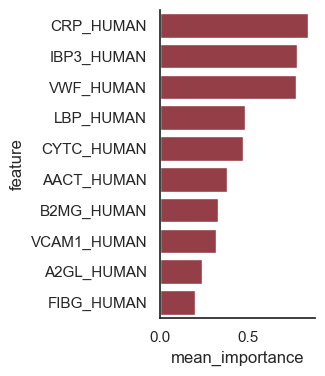

In [58]:
sns.set_theme(context="notebook", style="white")

g = sns.barplot(
    data=final_protein_importances,
    y="feature",
    x="mean_importance",
    color="#A32F3C"
)

g.figure.set_size_inches((2, 4))

sns.despine()

In [59]:
g.figure.savefig(
    "sepsis_feature_importances.pdf", dpi=300, bbox_inches="tight"
)

In [60]:
final_protein_importances.to_csv(
    "sepsis_feature_importances.tsv",
    sep="\t",
    index=False
)

In [61]:
from umap import UMAP

reducer = UMAP(
    n_components=2,
    random_state=42,
    #n_neighbors=5
)

In [62]:
components = reducer.fit_transform(X[selected_features])

In [63]:
design_matrix_train['UMAP 1'] = components[:, 0]
design_matrix_train['UMAP 2'] = components[:, 1]

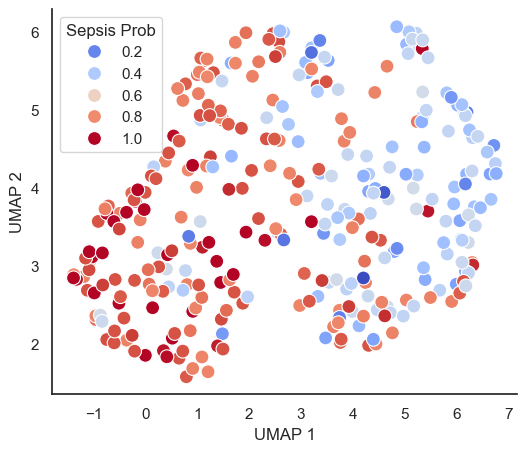

In [64]:
cm_to_inch = 1 / 2.54

g = sns.scatterplot(
    data=design_matrix_train,
    x="UMAP 1",
    y="UMAP 2",
    hue="Sepsis Prob",
    palette="coolwarm",
    s=100
)

sns.despine()
g.figure.set_size_inches((6, 5))

In [65]:
g.figure.savefig(
    "sepsis_molecular_map.pdf", dpi=300, bbox_inches="tight"
)

In [66]:
design_matrix_train = design_matrix_train.set_index("injection").join(X[selected_features])

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

model = AgglomerativeClustering(n_clusters=2)
design_matrix_train['Cluster'] = model.fit_predict(design_matrix_train[selected_features])
print(silhouette_score(design_matrix_train[selected_features], design_matrix_train['Cluster']))



0.2475122017941092


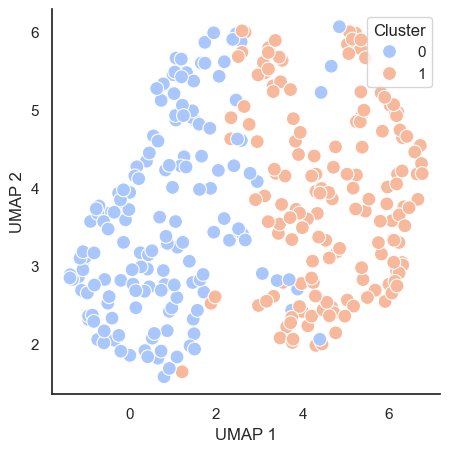

In [68]:
cm_to_inch = 1 / 2.54

g = sns.scatterplot(
    data=design_matrix_train,
    x="UMAP 1",
    y="UMAP 2",
    hue="Cluster",
    palette="coolwarm",
    s=100
)

sns.despine()
g.figure.set_size_inches((5, 5))

In [69]:
final_protein_importances.to_csv(
    "highrisk_sepsis_importances.tsv",
    sep="\t",
    index=False
)

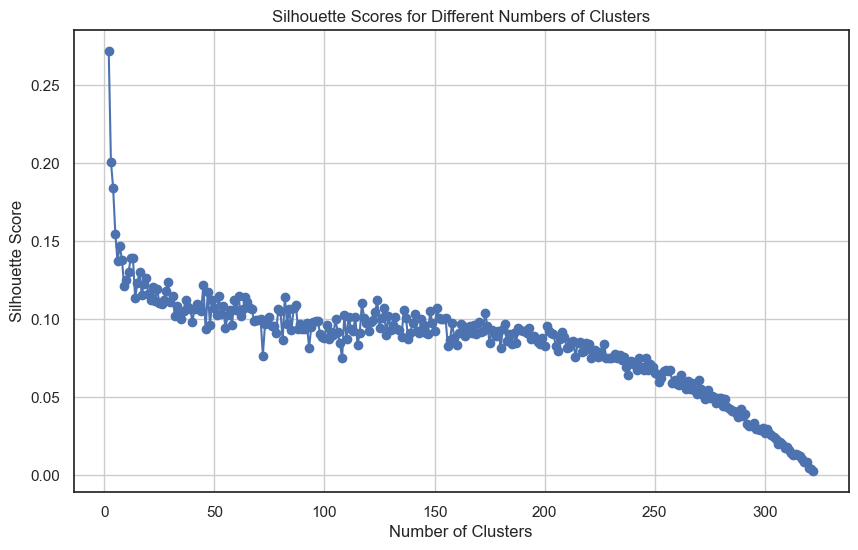

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Assuming X is your preprocessed data
# X = ...

silhouette_scores = []
cluster_range = range(2, X.shape[0])

for n_clusters in cluster_range:
    model = KMeans(n_clusters=n_clusters)
    cluster_labels = model.fit_predict(X[selected_features])
    silhouette_avg = silhouette_score(X[selected_features], cluster_labels)
    silhouette_scores.append(silhouette_avg)
    #print(f'Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.4f}')

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

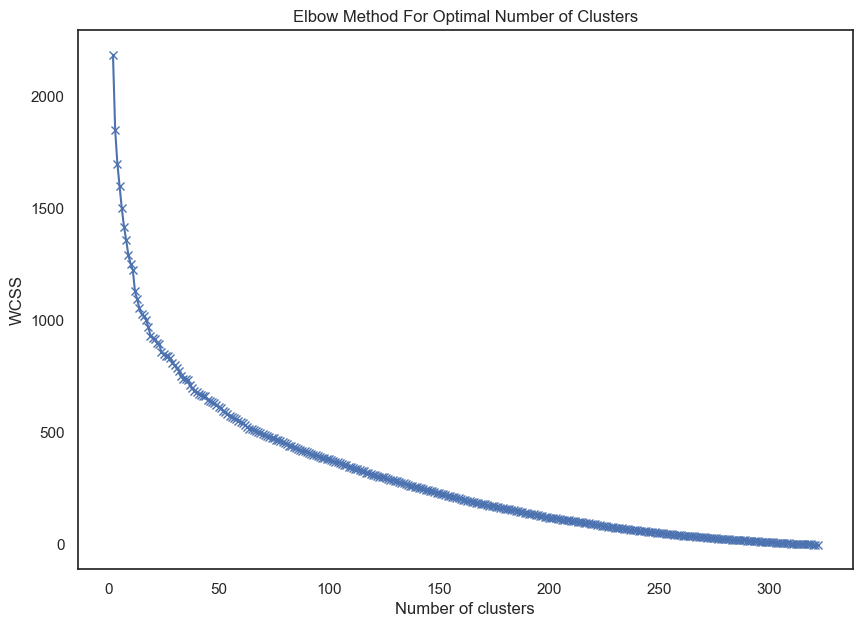

In [71]:
K = range(2, 
          X.shape[0]
          )

wcss = []
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X[selected_features])
    cluster_labels = kmeans.fit_predict(X[selected_features])
    silhouette_avg = silhouette_score(X[selected_features], cluster_labels)
    silhouette_scores.append(silhouette_avg)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 7))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.savefig("elbow.pdf", dpi=300, bbox_inches="tight")
plt.show()


In [72]:
from kneed import KneeLocator

kneedle = KneeLocator(K, wcss, curve="convex", direction="decreasing")

In [73]:
print(round(kneedle.knee, 3))

print(round(kneedle.elbow, 3))

26
26


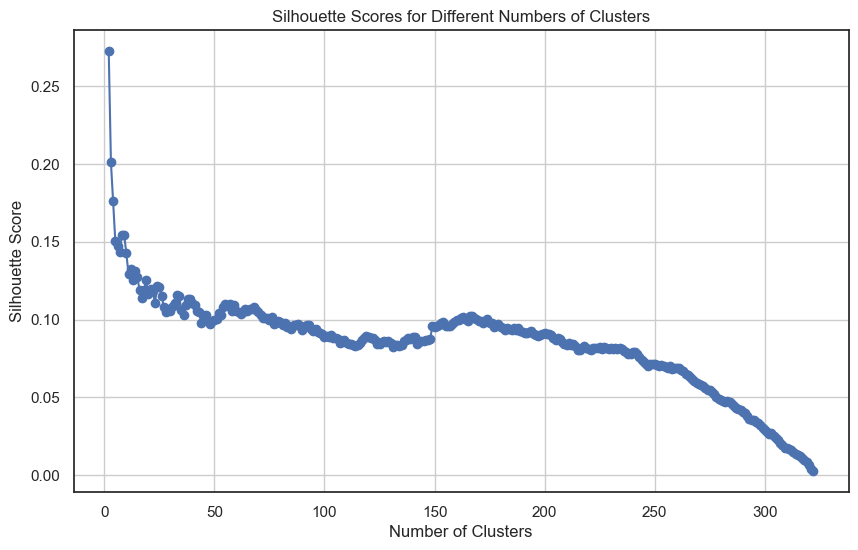

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.savefig("sillhoute_scores.pdf", dpi=300, bbox_inches="tight")
plt.show()


In [75]:
data = np.array(silhouette_scores[42:200])

mean_silhoutte_score = np.mean(data)

mad = np.mean(np.abs(data - mean_silhoutte_score))
mad

0.005892976401995176

In [76]:
coagulation_genes = enr.res2d[enr.res2d['Term'] == "Negative Regulation Of Blood Coagulation (GO:0030195)"]['Genes'].str.split(";").values[0]
coagulation_genes

['FGB', 'VTN', 'FGA', 'PROC', 'APOH', 'FGG', 'PLG', 'F2', 'KLKB1', 'KNG1']

In [77]:
hdl_genes = enr.res2d[enr.res2d['Term'] == "High-Density Lipoprotein Particle Remodeling (GO:0034375)"]['Genes'].str.split(";").values[0]
hdl_genes

['CETP', 'APOM', 'APOC1', 'APOA2', 'APOC3', 'LCAT', 'APOA4', 'PLTP']

In [78]:
quant_matrix_de

,Protein,ProteinLabel,Gene,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,...,SA_BOX_15-663_S4-C1_1_6694,SA_BOX_1-259_S1-G5_1_6827,SA_BOX_14-1566_S2-H4_1_6625,SA_BOX_8-1160_S5-E3_1_6025,SA_BOX_12-1949_S5-C4_1_6424,SA_BOX_10-1165_S2-B6_1_6243,SA_BOX_6-659_S2-F10_1_5887,SA_BOX_2-764_S2-G2_1_6901,SA_BOX_4-1196_S5-A2_1_5621,Color
0,P02671,FIBA_HUMAN,FGA,0.709301,19.453968,19.204283,0.234361,0.299039,0.249685,1.617794e-15,...,19.219480,19.434650,19.600700,19.945478,19.228436,19.440404,19.413945,19.446866,19.085731,1
1,P02787,TRFE_HUMAN,TF,0.308802,19.510932,19.664578,0.263755,0.268360,-0.153646,5.052828e-07,...,19.093970,19.402185,19.341731,18.815082,19.635437,19.738758,19.648279,19.465896,19.637913,1
2,P08603,CFAH_HUMAN,CFH,0.076284,17.233920,17.314798,0.373505,0.363239,-0.080879,5.280522e-02,...,17.087498,17.010549,16.689124,17.421490,17.058088,17.522319,17.597810,17.200768,17.560573,0
3,P00450,CERU_HUMAN,CP,0.081873,17.428322,17.348166,0.325347,0.357264,0.080157,3.697762e-02,...,17.101894,17.113322,16.792584,17.170518,17.848949,17.771656,17.484797,17.819514,17.413699,0
4,P06396,GELS_HUMAN,GSN,0.262258,14.902279,15.123472,0.445965,0.441724,-0.221193,1.364643e-05,...,14.084810,14.368574,14.117389,14.110880,14.517564,15.487246,15.026240,15.276030,15.243752,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,P23470,PTPRG_HUMAN,PTPRG,0.120195,8.727730,8.529771,1.336383,1.368673,0.197959,1.943867e-01,...,9.817244,9.140261,9.233517,8.540298,8.800283,9.219896,8.147713,8.940368,9.171680,0
283,P04066,FUCO_HUMAN,FUCA1,0.103561,7.635184,7.460256,1.917471,1.917812,0.174927,4.189931e-01,...,7.683844,8.037318,7.042684,8.710018,9.250549,7.889671,3.901654,4.242916,9.137236,0
284,P13473,LAMP2_HUMAN,LAMP2,0.143733,9.885955,10.121383,1.463434,1.199995,-0.235428,1.246042e-01,...,3.397471,9.876204,10.132031,10.770226,10.770148,10.886836,10.803724,10.217573,9.586891,0
285,Q7L2H7,EIF3M_HUMAN,EIF3M,0.228714,15.072522,15.326076,0.642458,0.528454,-0.253554,1.917373e-04,...,13.366689,15.305685,14.133238,14.485120,14.229865,15.736272,15.519163,15.556819,15.838997,1


In [79]:
proteins, labels = quant_matrix_train.to_ml(feature_column="Gene")

In [80]:
proteins[coagulation_genes]

,FGB,VTN,FGA,PROC,APOH,FGG,PLG,F2,KLKB1,KNG1
SA_BOX_15-464_S4-G9_1_6763,19.802505,17.080660,19.832547,10.893422,16.638315,19.479392,16.777349,16.315175,13.743195,16.971350
SA_BOX_7-1728_S4-F9_1_5977,19.518717,17.458097,18.916951,11.705831,17.476599,19.318721,17.198404,16.858771,14.503167,17.906972
SA_BOX_13-332_S1-H3_1_6519,18.552759,16.883847,18.652689,11.037997,15.885892,18.550353,16.325520,16.108025,13.790570,16.993216
SA_BOX_4-704_S5-D2_1_5624,19.569449,17.144104,19.320538,11.579269,17.287636,19.296441,16.801482,16.389177,14.030325,17.514731
SA_BOX_12-2003_S5-H6_1_6445,19.114711,16.902996,19.020035,11.921305,17.171050,18.964521,16.809712,16.269824,14.161713,17.333299
...,...,...,...,...,...,...,...,...,...,...
SA_BOX_12-1949_S5-C4_1_6424,19.446618,15.796466,19.228436,10.560596,16.244974,19.117447,16.042956,16.288419,13.577037,17.041715
SA_BOX_10-1165_S2-B6_1_6243,19.775626,17.259485,19.440404,11.859956,16.862550,19.386593,17.153431,16.947221,14.646551,17.543998
SA_BOX_6-659_S2-F10_1_5887,19.677826,17.210969,19.413945,11.576106,16.283875,19.181323,16.960593,16.484990,13.572527,17.627408
SA_BOX_2-764_S2-G2_1_6901,19.805596,16.974092,19.446866,11.388707,17.179062,19.479889,16.731167,16.605034,13.790136,17.483343


In [81]:
lut = dict(zip(labels['label'].unique(), "rb"))
row_colors = labels['label'].map(lut)

In [82]:
lut

{1: 'r', 0: 'b'}

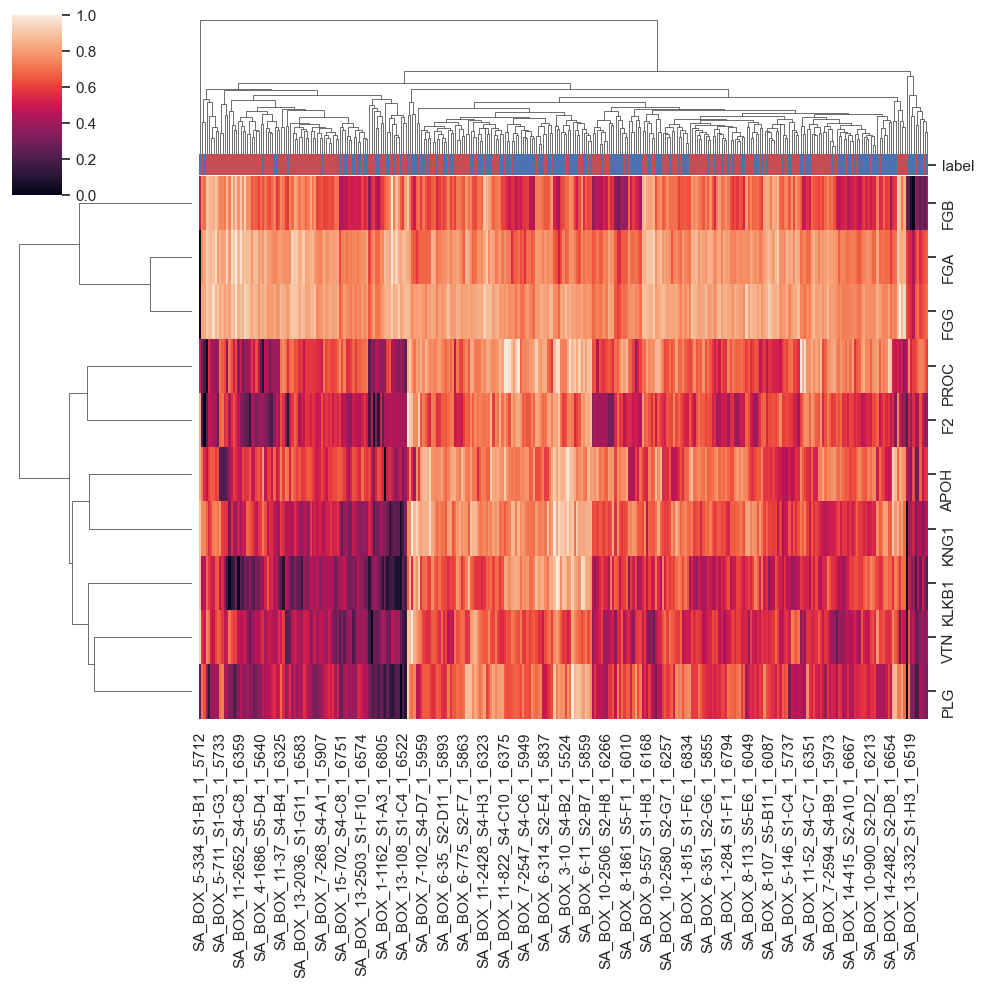

In [83]:
sns.clustermap(
    proteins[coagulation_genes].T, 
    col_colors=row_colors, 
    standard_scale=0, 
    #z_score=0
)

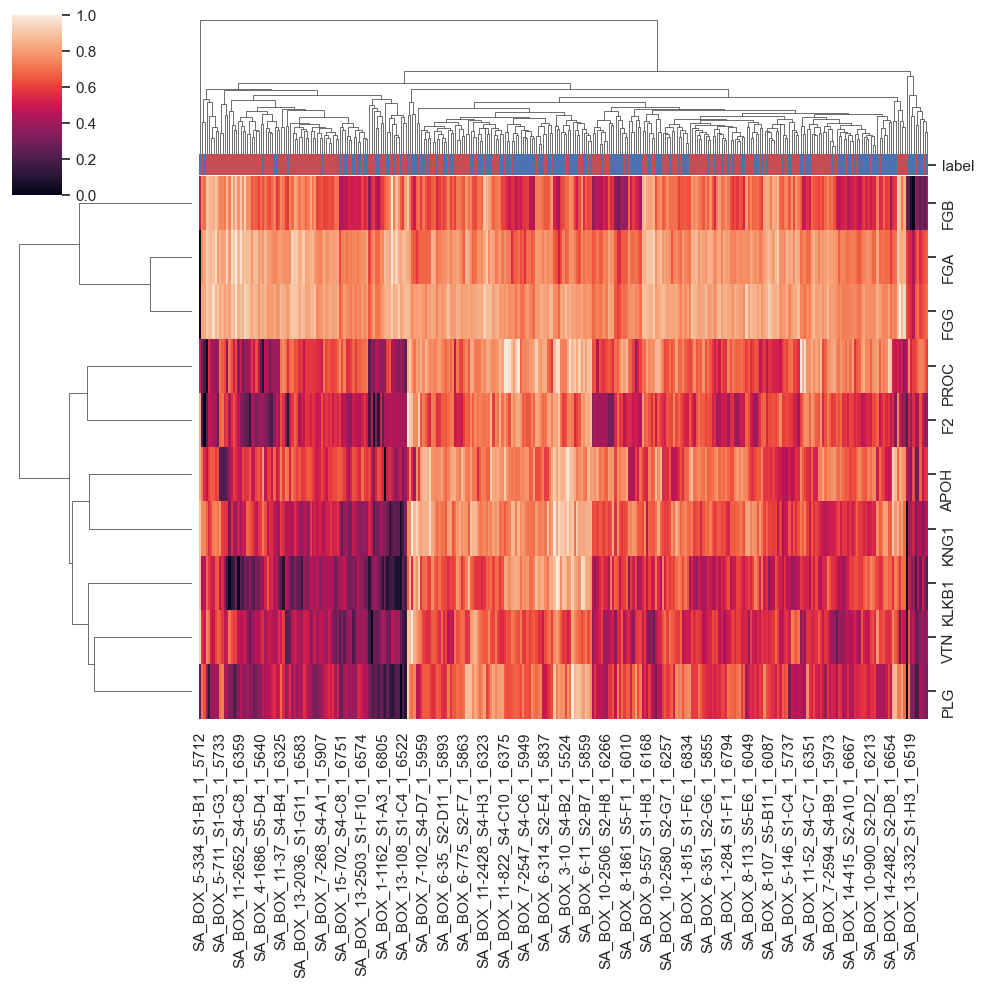

In [84]:
sns.clustermap(
    proteins[coagulation_genes].T, 
    col_colors=row_colors, 
    standard_scale=0, 
    #z_score=0
)

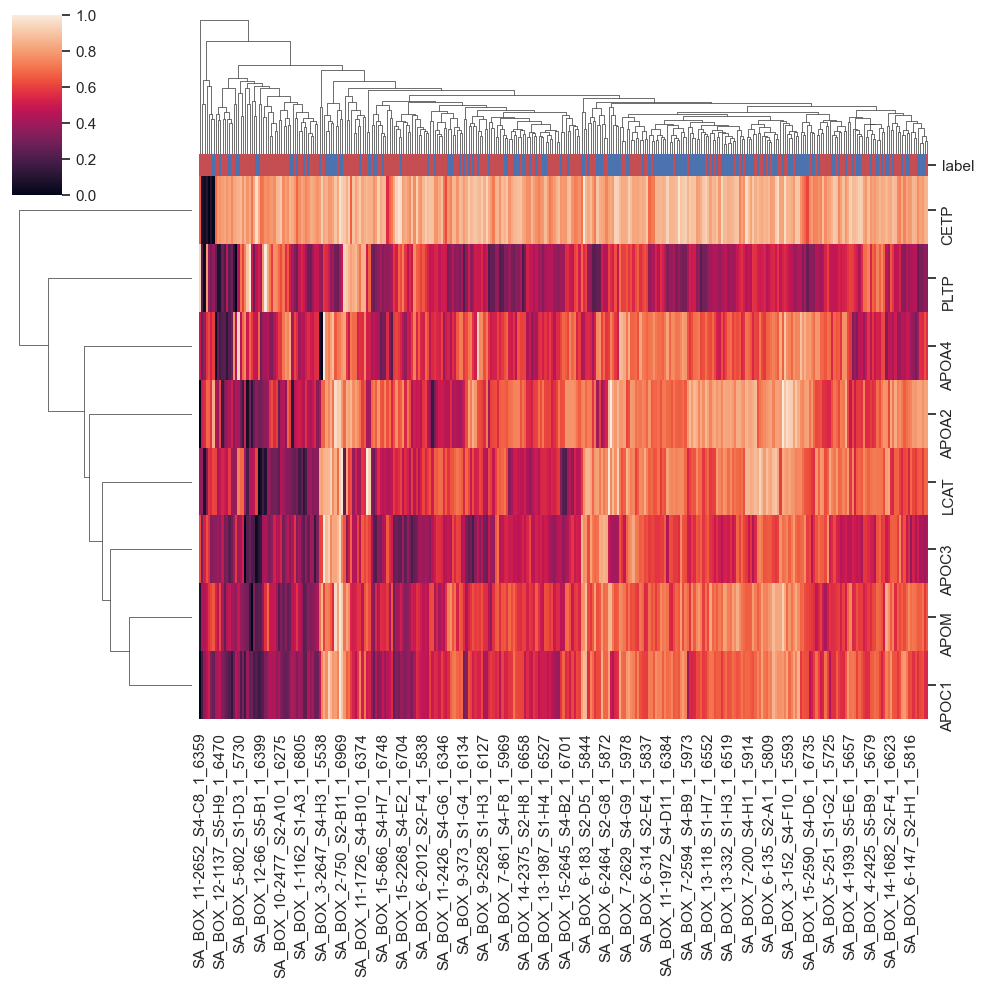

In [85]:
sns.clustermap(
    proteins[hdl_genes].T, 
    col_colors=row_colors, 
    standard_scale=0, 
    #z_score=1
)